In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
admissions = pd.read_csv("Admission Test.csv")

In [3]:
admissions

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
admissions.info()
admissions.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [5]:
admissions.Attendance = admissions.Attendance.map({"No":0,"Yes":1})

In [6]:
admissions

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [7]:
admissions.Attendance.unique()

array([0, 1], dtype=int64)

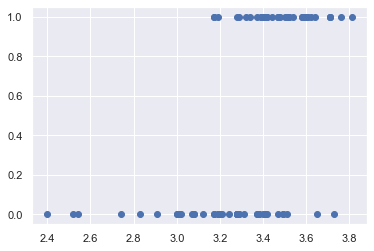

In [8]:
plt.scatter(admissions.GPA, admissions.Attendance,)
plt.show()

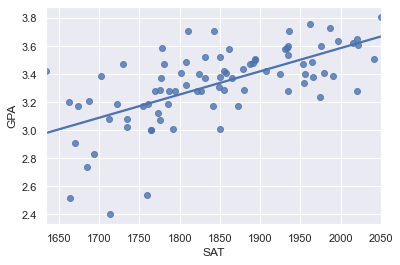

In [9]:
sns.regplot(x = "SAT", y = "GPA", data = admissions, ci =None)
plt.show()

C:\Users\S_Huzaifa_Ali_H\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


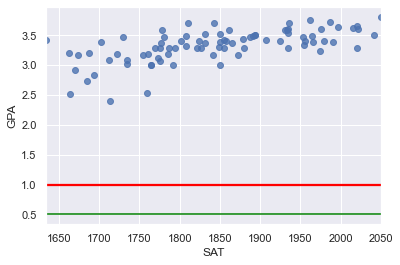

In [10]:
sns.regplot(x = "SAT", y = "GPA", data = admissions, ci =None, logistic=True,
           line_kws = {"color":"red"})

plt.axhline(0.5, color = "green")
plt.show()

In [11]:
X = admissions[["GPA"]]
y = admissions.Attendance

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
pred_probs = model.predict_proba(X_test)
pred_probs[:,1]

array([0.36722747, 0.49105794, 0.51928949, 0.54739841, 0.26972803,
       0.58894775, 0.0088018 , 0.62926609, 0.36722747, 0.11212645,
       0.75958315, 0.15791648, 0.69242702, 0.82430407, 0.23767742,
       0.36722747, 0.79840128])

In [16]:
prediction = model.predict(X_test)
prediction

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

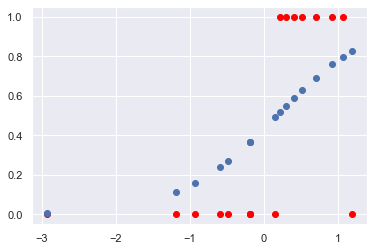

In [17]:
plt.scatter(X_test, y_test, color = "red")
plt.scatter(X_test, pred_probs[:,1])
plt.show()

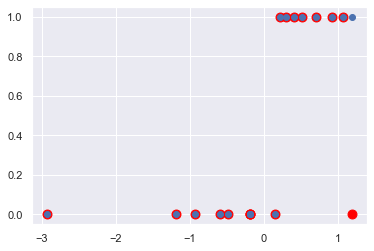

In [18]:
plt.scatter(X_test, y_test, color = "red" , s = 80)
plt.scatter(X_test, prediction)
plt.show()

In [19]:
prediction

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

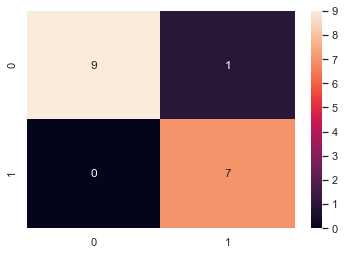

In [21]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True)

In [26]:
y_test

30    0
40    0
43    1
50    1
22    0
54    1
2     0
56    1
26    0
8     0
69    1
13    0
66    1
77    0
16    0
27    0
75    1
Name: Attendance, dtype: int64

In [23]:
prediction

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [28]:
print(classification_report(y_test, prediction))
np.array(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



array('              precision    recall  f1-score   support\n\n           0       1.00      0.90      0.95        10\n           1       0.88      1.00      0.93         7\n\n    accuracy                           0.94        17\n   macro avg       0.94      0.95      0.94        17\nweighted avg       0.95      0.94      0.94        17\n',
      dtype='<U326')

In [25]:
model.score(X_test,y_test)

0.9411764705882353